In [1]:
import pandas as pd
import numpy as np
import os
from keplergl import KeplerGl
import matplotlib.pyplot as plt

plt.style.use(['mystyle'])

In [3]:
df = pd.read_csv(os.path.join("..", "output", "clusteredData_Resolution=4_byProvider=True_byPosDet=True.csv"))
df

,hexbin,GNSS_quality_mean,GNSS_quality_std,count_in_hexbin,mobile_quality_mean,mobile_quality_std,latency_mean,latency_std,hexbin_center_lat,hexbin_center_lon,determination_position,provider
0,8408133ffffffff,0.601718,0.037775,467,13.815777,2.969394,2.912274,4.851070,63.114136,14.595753,1.0,32.0
1,8408143ffffffff,0.600648,0.027135,12,9.965417,1.587478,7.451250,12.294270,62.859363,10.419832,1.0,32.0
2,8408159ffffffff,0.621156,0.047279,374,747.385816,10028.683324,12.285307,87.996643,63.415796,10.016467,1.0,32.0
3,8408327ffffffff,0.572072,0.000000,1,9.932000,0.000000,2.068000,0.000000,62.469740,8.620416,1.0,32.0
4,840880dffffffff,0.568834,0.023543,4,117615.786250,135799.592753,4.463750,2.810478,59.967940,17.689079,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7187,841f467ffffffff,0.000000,0.000000,1,119.762000,0.000000,2.238000,0.000000,54.408552,22.959991,4.0,37.0
7188,841f515ffffffff,0.000000,0.000000,1,113.036000,0.000000,140.964000,0.000000,52.870709,22.220513,4.0,37.0
7189,841f91bffffffff,0.000000,0.000000,3,1302.513333,83.591824,2.153333,1.032047,46.333748,6.051832,4.0,37.0
7190,841fac7ffffffff,0.000000,0.000000,1,154.206000,0.000000,1.794000,0.000000,50.488444,9.119624,4.0,37.0


In [4]:
df[df["determination_position"]==3].count_in_hexbin.sum()

5462094

In [5]:
total_count = df.count_in_hexbin.sum()

provider_detPos_dataPointCount = np.zeros((3,3), dtype=np.int64)
for i, provider in enumerate([32, 35, 37]):
    for j, detPos in enumerate([1, 3, 4]):
        provider_detPos_dataPointCount[i, j] = df[ (df["provider"]==provider) & (df["determination_position"]==detPos) ].count_in_hexbin.sum()

#rows = provider 32,35,37
#cols = detPos 1, 3, 4
provider_detPos_dataPointCount

array([[67630731,    78421,  4183456],
       [78791212,        0,        0],
       [76183977,  5383673,  6062360]])

In [6]:
provider_detPos_dataPointCount[:,1]

array([  78421,       0, 5383673])

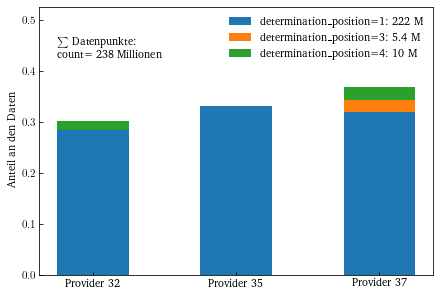

In [16]:
x = ['Provider 32', 'Provider 35', 'Provider 37']
y = provider_detPos_dataPointCount / total_count

x_pos = [1,2,3]
x_pos = [i*2 for i in x_pos]

fig, ax = plt.subplots(constrained_layout=True, facecolor='w', edgecolor='k')

ax.bar(x_pos, y[:,0], width = 1, label = 'determination_position=1: 222 M', color="tab:blue")
ax.bar(x_pos, y[:,1], width = 1, label = 'determination_position=3: 5.4 M', color="tab:orange", bottom = y[:,0])
ax.bar(x_pos, y[:,2], width = 1, label = 'determination_position=4: 10 M', color="tab:green", bottom = y[:,0]+y[:,1])
ax.set_xticks(x_pos, x)

#ax.set_ylabel("percentage of data points")
ax.set_ylabel("Anteil an den Daten")
ax.set_ylim([0, 0.525])
#ax.text(1.5, 0.425, f"no. of all data points:\n count= 238 Million")
Sigma = r"$\sum$"
ax.text(1.5, 0.425, f"{Sigma} Datenpunkte:\n count= 238 Millionen")
ax.legend()
ax.grid(False)
plt.show()

fig.savefig(os.path.join("..","output","data_count_byProv_byDetPos.pdf"))